# `datawrapper` a light-weigth wrapper around the [Datawrapper API](https://developer.datawrapper.de/docs/getting-started)
yeah I know... it's a lot to _wrap your head around._

<img src='https://i.kym-cdn.com/entries/icons/original/000/014/959/Screenshot_116.png' style='width:100px' />

To use `datawrapper` you're going to need a Datawrapper access token. If you have a Datawrapper.de account go to https://app.datawrapper.de/account/api-tokens.

If you don't have a Datawrapper.de account, sign up for one. They're free.

***
First we'll import the Datawrapper class from `datawrapper` and pandas so we can add some sample data.

In [1]:
from datawrapper import Datawrapper
import pandas as pd

`datwrapper.Datawrapper` will load your access token if you have it as an environment variable `DATAWRAPPER_ACCESS_TOKEN`. If not, you'll have to pass it manually.

In [2]:
ACCESS_TOKEN = "<YOUR_API_ACCESS_TOKEN_HERE>"

In [3]:
dw = Datawrapper(access_token=ACCESS_TOKEN)

dw.account_info()

{'id': 414577,
 'email': 'sergio@cimarron.io',
 'name': 'Sergio Sánchez Zavala',
 'role': 'editor',
 'language': 'en-US',
 'teams': [],
 'chartCount': 2,
 'url': '/v3/users/414577'}

We'll use the same data the *Getting Started* tutorial from the API docs uses.

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/chekos/datasets/master/data/datawrapper_example.csv", sep=';')
df.head()

,country,Share of population that lives in the capital,in other urban areas,in rural areas
0,Iceland (Reykjavík),56.02,38.0,6.0
1,Argentina (Buenos Aires),34.95,56.6,8.4
2,Japan (Tokyo),29.52,63.5,7.0
3,UK (London),22.70,59.6,17.7
4,Denmark (Copenhagen),22.16,65.3,12.5


***
To create a chart and add data in one call just use `datawrapper.create_chart()` and pass the pandas DataFrame as the data argument. It will return a JSON with your new chart's information.

In [5]:
chart_info = dw.create_chart(title = 'Where do people live?', chart_type = 'd3-bars-stacked', data = df)

New chart d3-bars-stacked created!


In [6]:
chart_info

{'publicId': 'wbYH0',
 'language': 'en-US',
 'theme': 'datawrapper-data',
 'title': 'Where do people live?',
 'type': 'd3-bars-stacked',
 'metadata': {'data': {},
  'describe': {'source-name': '',
   'source-url': '',
   'intro': '',
   'byline': '',
   'aria-description': ''},
  'visualize': {},
  'publish': {'blocks': {'logo': {'enabled': False},
    'embed': False,
    'download-pdf': False,
    'download-svg': False,
    'get-the-data': True,
    'download-image': False}}},
 'authorId': 414577,
 'id': 'wbYH0',
 'lastModifiedAt': '2022-02-19T19:34:32.379Z',
 'createdAt': '2022-02-19T19:34:32.355Z',
 'url': '/v3/charts/wbYH0'}

To add a source and a byline you can use `datawrapper.update_description()`

In [7]:
dw.update_description(
    chart_info['id'],
    source_name = 'UN Population Division',
    source_url = 'https://population.un.org/wup/',
    byline = 'datawrapper at pypi',
)

Chart updated!


Almost done! Your chart exists now but it's not published. In fact, you could go to `https://datawrapper.de/chart/<ID>/visualize` (add your new chart's id) to see how it looks like right now. 

To publish it you can use `datawrapper.publish_chart()`, just pass it your chart's id. 

In [8]:
dw.publish_chart(chart_id = chart_info['id'])


![nooice](https://media1.tenor.com/images/d2c70f7f64587dc3b7c86ee06756fb4a/tenor.gif?itemid=4294979)

You can edit its metadata by passing them as a dictionary to `datawrapper.update_metadata()`. In this case, we want to make the bars thick and add custom colors to each of our labels.

In [9]:
properties = {
    'visualize' : {
        'thick': True,
        'custom-colors': {
            'in rural areas': '#dadada',
            'in other urban areas': '#1d81a2',
            'Share of population that lives in the capital': '#15607a'
        },
    }
}
dw.update_metadata(chart_info['id'], properties)

Chart's metadata updated!


You'll have to republish your _new new_ chart.

In [10]:
dw.publish_chart(chart_info['id'])

You can also **export** your chart as a `png` with `datwrapper.export_chart()`! (pdf and svg coming!)

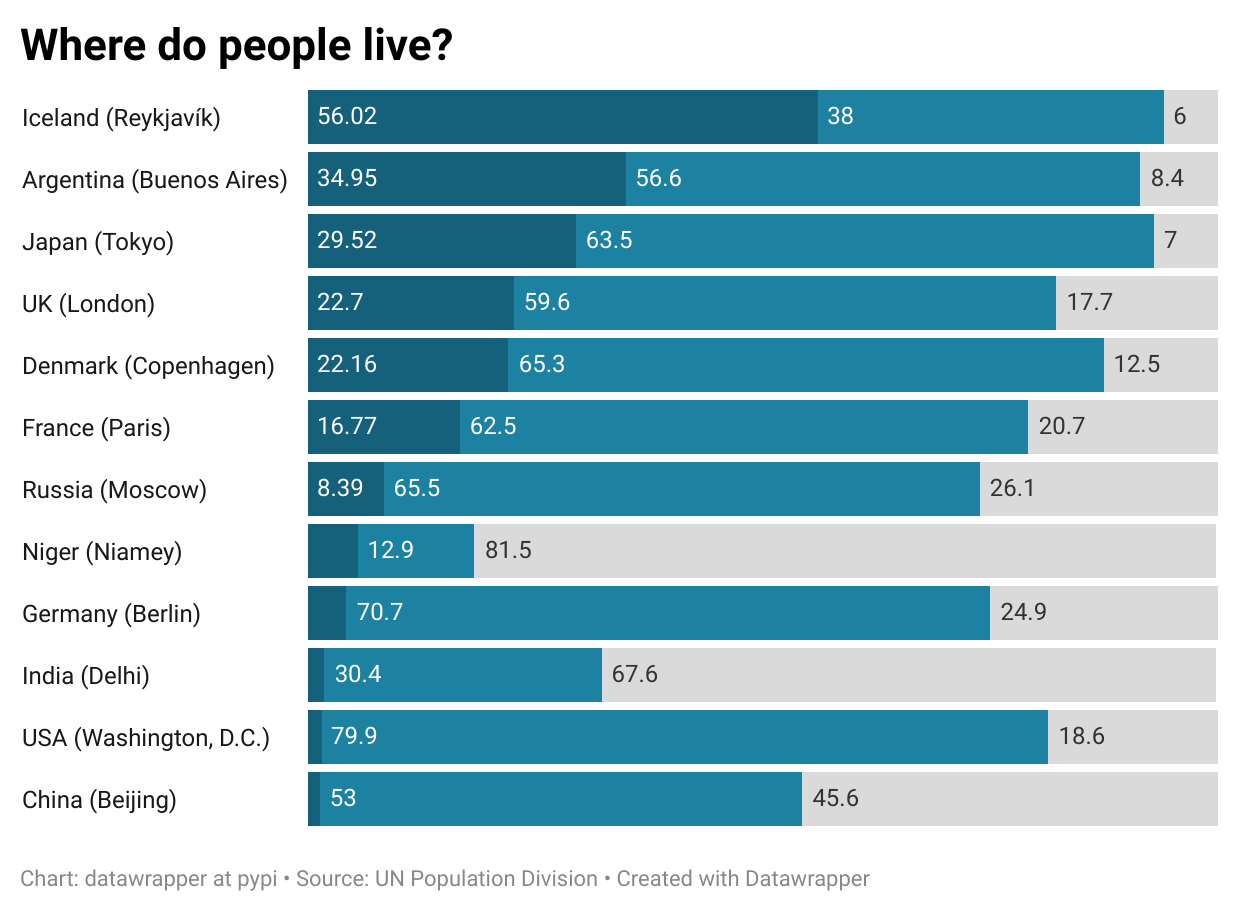

In [11]:
dw.export_chart(chart_info['id'], output = 'png', filepath = 'chart.png', display = True, width = 600)